# Scaling

In [1]:
from imports import *

# set columnns display format
pd.set_option('display.max_columns', None)
# default pandas decimal number display format
# pd.options.display.float_format = '{:20,.3f}'.format

In [2]:
# import raw, messy data
df = acquire.get_zillow_data()

In [3]:
df = prepare.prep_zillow(df)

In [4]:
df.head()

,parcelid,bathrooms,bedrooms,total_sqft,living_sqft,full_bath,latitude,longitude,lot_sqft,roomcnt,structure_value,assessed_value,land_value,taxamount,logerror,age,taxrate,county,transaction_month,county_Los Angeles,county_Orange,county_Ventura,zip_code,zip_bin,zip_bin_insgfnt high,zip_bin_insgfnt low,zip_bin_sgfnt high,zip_bin_sgfnt low
0,14297519,3.5,4.0,3100.0,3100.0,3.0,33.634931,-117.869207,4506.0,0.0,485713.0,1023282.0,537569.0,11013.72,0.025595,19,1.076313,Orange,1,0,1,0,92660,insgfnt high,1,0,0,0
1,17052889,1.0,2.0,1465.0,1465.0,1.0,34.449266,-119.281531,12647.0,5.0,88000.0,464000.0,376000.0,5672.48,0.055619,50,1.222517,Ventura,1,0,0,1,93023,insgfnt high,1,0,0,0
2,14186244,2.0,3.0,1243.0,1243.0,2.0,33.886168,-117.823170,8432.0,6.0,85289.0,564778.0,479489.0,6488.30,0.005383,55,1.148823,Orange,1,0,1,0,92886,insgfnt high,1,0,0,0
3,12177905,3.0,4.0,2376.0,2376.0,3.0,34.245180,-118.240722,13038.0,0.0,108918.0,145143.0,36225.0,1777.51,-0.103410,47,1.224661,Los Angeles,1,1,0,0,91214,insgfnt low,0,1,0,0
4,12069064,1.0,2.0,738.0,738.0,1.0,34.149214,-118.239357,4214.0,0.0,18890.0,218552.0,199662.0,2366.08,0.101723,95,1.082616,Los Angeles,1,1,0,0,91206,sgfnt high,0,0,1,0


In [5]:
# Copy a new dataframe to perform feature engineering
scaled_df = df.copy()

# Initiate MinMaxScaler
scaler = MinMaxScaler()

# Fit numerical features to scaler
scaler.fit(scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']])

# Set the features to transformed value
scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']] = scaler.transform(scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']])

# Split the scaled data into train, validate, test
train, validate, test = prepare.split(scaled_df)

# # Split each dataset into X, y
# cols = ['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
#         'latitude', 'longitude', 'lot_sqft', 'roomcnt', 'zip_code',
#         'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age', 'county_Los Angeles',
#         'county_Orange', 'county_Ventura']
# X_train = s_train[cols]
# y_train = s_train.logerror
# X_validate = s_validate[cols] 
# y_validate = s_validate.logerror
# X_test = s_test[cols]
# y_test = s_test.logerror

In [164]:
def split_scale(df):
    # Copy a new dataframe to perform feature engineering
    scaled_df = df.copy()

    # Initiate MinMaxScaler
    scaler = MinMaxScaler()

    # Fit numerical features to scaler
    scaler.fit(scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']])

    # Set the features to transformed value
    scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']] = scaler.transform(scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']])

    # Split the scaled data into train, validate, test
    train, validate, test = prepare.split(scaled_df)
    return train, validate, test

# Clustering

## Approaches / Clusters to try:
- **Location** (`latitude`, `longitude`, `county`, `zip_code`)
- **Age** (`age`)
- **Area** (`total_sqft`, `living_sqft`, `lot_sqft`)
- **Size (rooms)** (`bedrooms`, `bathrooms`, `full_bath`, `roomcnt`)
- **Value** (`structure_value`, `assessed_value`,`land_value`, `taxamount`)

## Location Cluster

<span style='background :yellow' >**latitude, longitude, zip_code(dummies), k=3**</span >

In [6]:
train.columns

Index(['parcelid', 'bathrooms', 'bedrooms', 'total_sqft', 'living_sqft',
       'full_bath', 'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount',
       'logerror', 'age', 'taxrate', 'county', 'transaction_month',
       'county_Los Angeles', 'county_Orange', 'county_Ventura', 'zip_code',
       'zip_bin', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high', 'zip_bin_sgfnt low'],
      dtype='object')

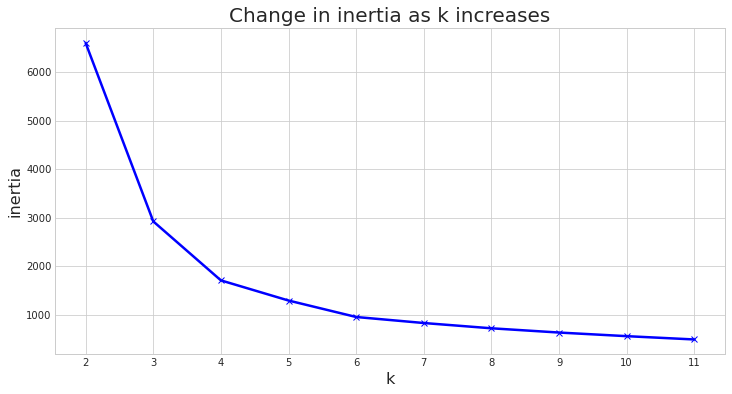

In [7]:
# Select features for cluster
cluster_vars = train[['latitude', 'longitude', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [8]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_a'] = location_clusters
train.head()

,parcelid,bathrooms,bedrooms,total_sqft,living_sqft,full_bath,latitude,longitude,lot_sqft,roomcnt,structure_value,assessed_value,land_value,taxamount,logerror,age,taxrate,county,transaction_month,county_Los Angeles,county_Orange,county_Ventura,zip_code,zip_bin,zip_bin_insgfnt high,zip_bin_insgfnt low,zip_bin_sgfnt high,zip_bin_sgfnt low,location_clusters_a
36408,11852584,0.166667,0.333333,0.223146,0.223146,0.166667,0.479513,0.722402,0.142086,0.000000,0.224745,0.369544,0.220483,0.127198,0.008887,0.420290,1.512845,Los Angeles,7,1,0,0,90640,insgfnt high,1,0,0,0,1
38129,12470054,0.166667,0.333333,0.115889,0.115889,0.166667,0.354453,0.689652,0.131308,0.000000,0.058301,0.161524,0.149972,0.053462,-0.032206,0.442029,1.306395,Los Angeles,8,1,0,0,90712,insgfnt high,1,0,0,0,1
26349,14033839,0.166667,0.333333,0.155691,0.155691,0.166667,0.274714,0.811325,0.130391,0.583333,0.114497,0.445096,0.387699,0.113596,-0.003708,0.333333,1.141333,Orange,6,0,1,0,92708,insgfnt low,0,1,0,0,0
31869,17194875,0.250000,0.500000,0.418958,0.418958,0.166667,0.592341,0.264595,0.202229,0.666667,0.643307,0.847675,0.352690,0.200244,0.007720,0.094203,1.095202,Ventura,7,0,0,1,91320,insgfnt low,0,1,0,0,0
24862,11903595,0.166667,0.333333,0.187020,0.187020,0.166667,0.521157,0.693129,0.118126,0.000000,0.121888,0.445040,0.381510,0.118994,0.033695,0.471014,1.195283,Los Angeles,6,1,0,0,91803,insgfnt high,1,0,0,0,1


In [9]:
train.groupby('location_clusters_a').logerror.mean()

location_clusters_a
0    0.010163
1    0.027405
2    0.008727
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_a', ylabel='logerror'>

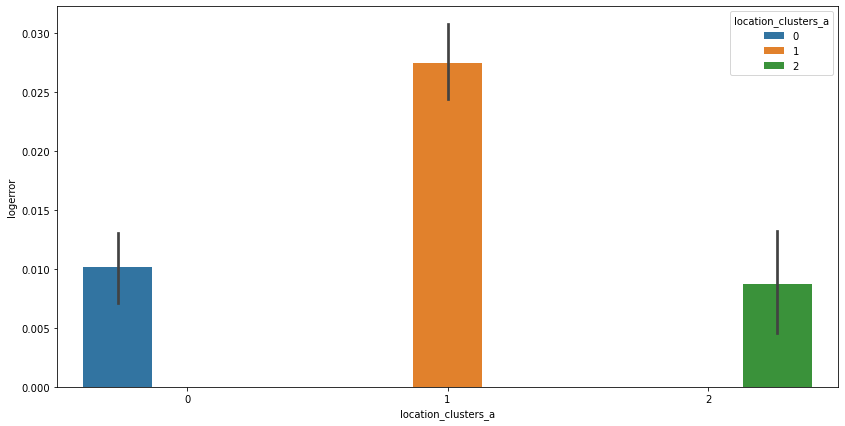

In [10]:
plt.figure(figsize = (14,7))
sns.barplot(x='location_clusters_a', y=
            'logerror', hue='location_clusters_a', data = train)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

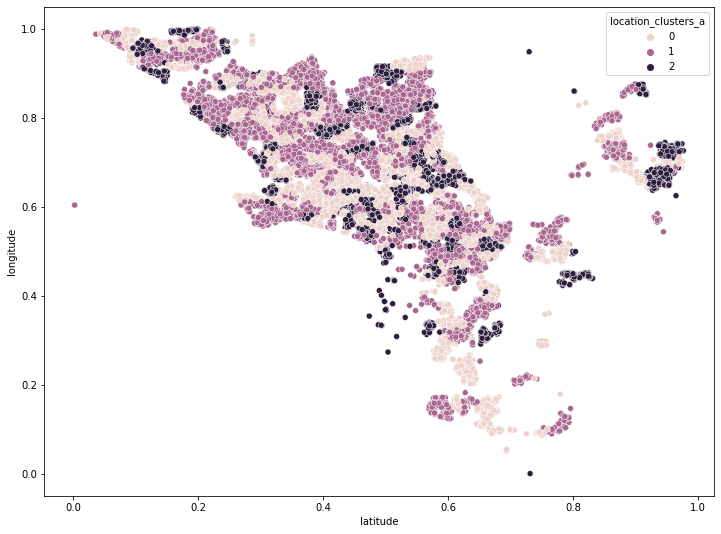

In [11]:
plt.figure(figsize = (12,9))
sns.scatterplot(x='latitude', y='longitude', hue = 'location_clusters_a', data=train)

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Logerror of three different clusters are all equal.

$H_{a}$: Logerror of three different clusters are not all equal.


**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

In [12]:
# Set alpha
alpha = 0.05
cluster0 = train[train.location_clusters_a==0].logerror
cluster1 = train[train.location_clusters_a==1].logerror
cluster2 = train[train.location_clusters_a==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 location clusters are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of 3 location clusters are not all equal. 


<span style='background :red' >**latitude, longitude, zip_code(dummies), k=4**</span >

In [19]:
# Create clusters and fit cluster model
cluster_vars = train[['latitude', 'longitude', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_b'] = location_clusters

<AxesSubplot:xlabel='location_clusters_b', ylabel='logerror'>

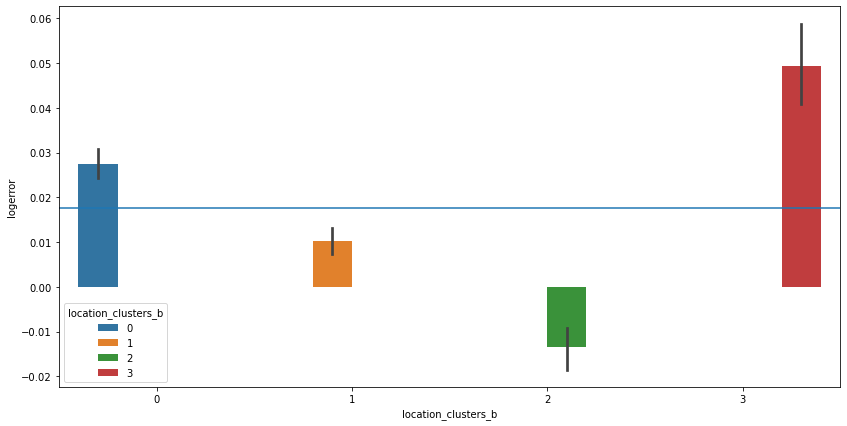

In [21]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_b', y=
            'logerror', hue='location_clusters_b', data = train)

<span style='background :yellow' >**latitude, longitude, zip_code(dummies), k=5**</span >

<AxesSubplot:xlabel='location_clusters_c', ylabel='logerror'>

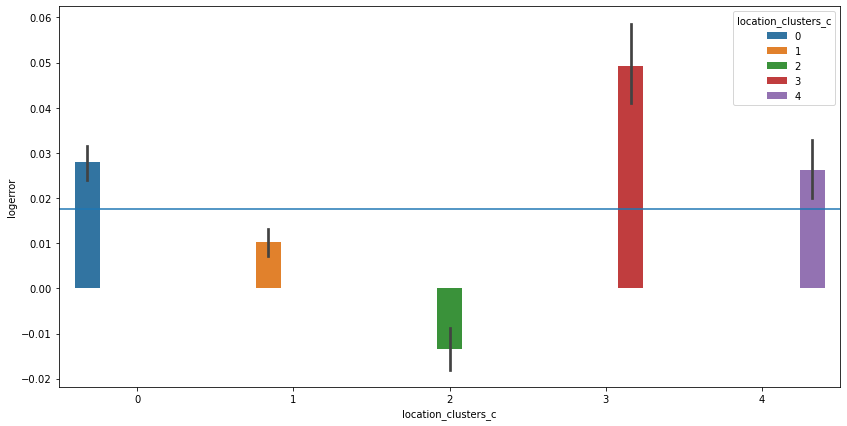

In [22]:
# Create clusters and fit cluster model
cluster_vars = train[['latitude', 'longitude', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_c'] = location_clusters
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_c', y=
            'logerror', hue='location_clusters_c', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=3**</span>

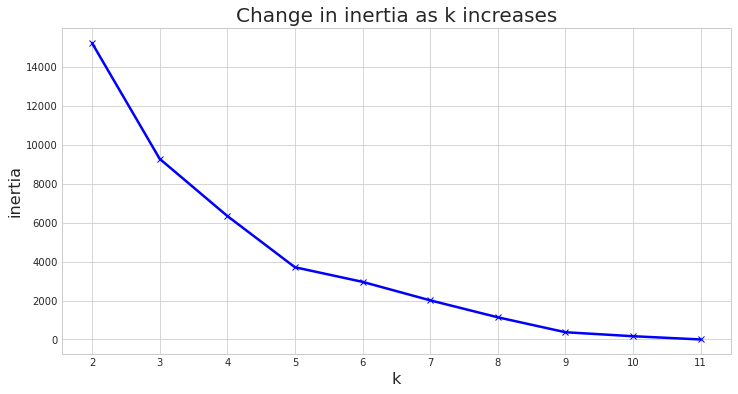

In [27]:
# Select features for cluster
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [28]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_d'] = location_clusters
train.groupby('location_clusters_d').logerror.mean()

location_clusters_d
0    0.027825
1    0.006586
2    0.024800
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_d', ylabel='logerror'>

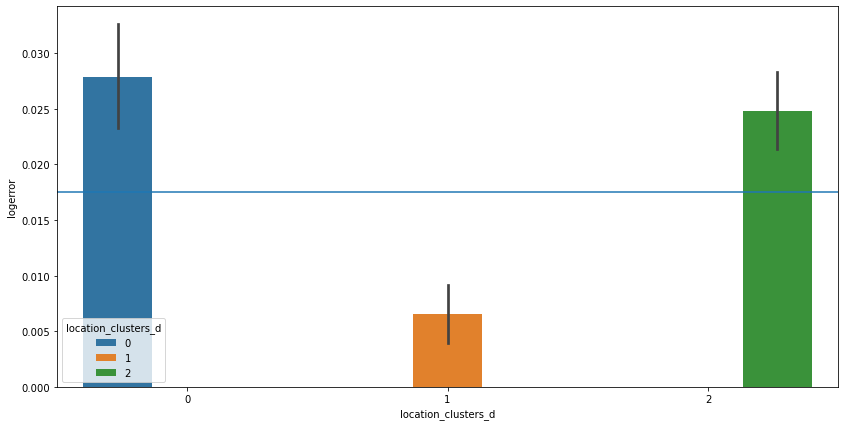

In [29]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_d', y=
            'logerror', hue='location_clusters_d', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=4**</span>

In [30]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_e'] = location_clusters
train.groupby('location_clusters_e').logerror.mean()

location_clusters_e
0    0.002800
1    0.027825
2    0.008969
3    0.024800
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_e', ylabel='logerror'>

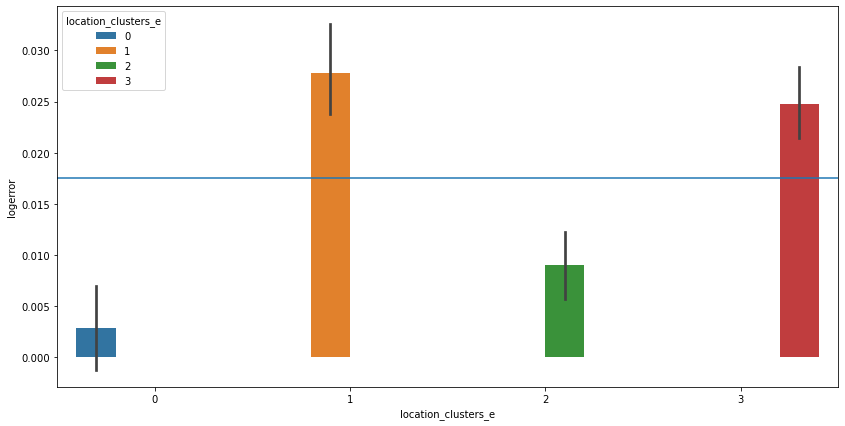

In [32]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_e', y=
            'logerror', hue='location_clusters_e', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=5**</span>

In [33]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_vars)
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_f'] = location_clusters
train.groupby('location_clusters_f').logerror.mean()

location_clusters_f
0    0.024800
1    0.002800
2    0.033393
3    0.007881
4    0.014222
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_f', ylabel='logerror'>

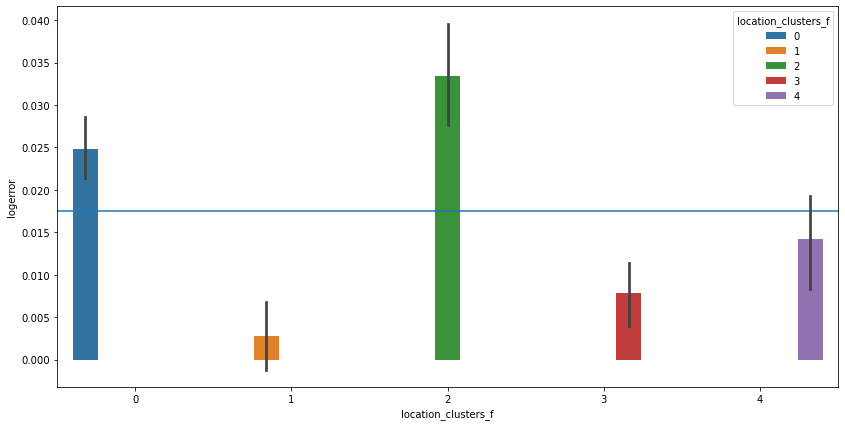

In [49]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_f', y=
            'logerror', hue='location_clusters_f', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=6**</span>

<AxesSubplot:xlabel='location_clusters_g', ylabel='logerror'>

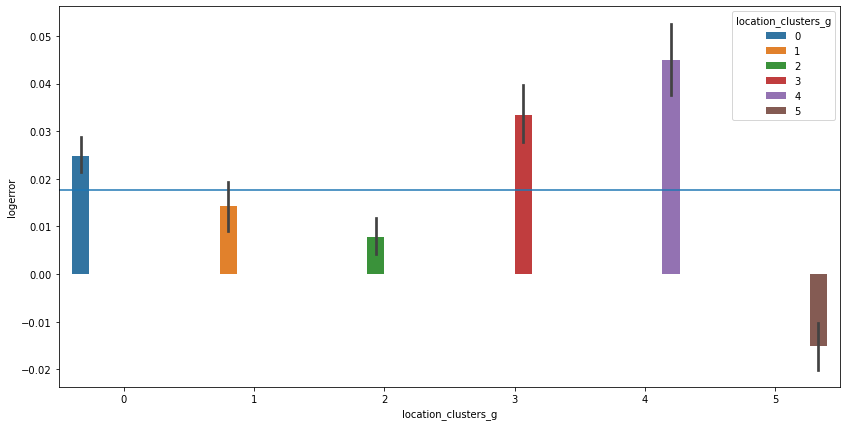

In [51]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=6)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_g'] = location_clusters
train.groupby('location_clusters_g').logerror.mean()
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_g', y=
            'logerror', hue='location_clusters_g', data = train)

<span style='background :red' >**zip_code, county(dummies), k=7**</span>

<AxesSubplot:xlabel='location_clusters_h', ylabel='logerror'>

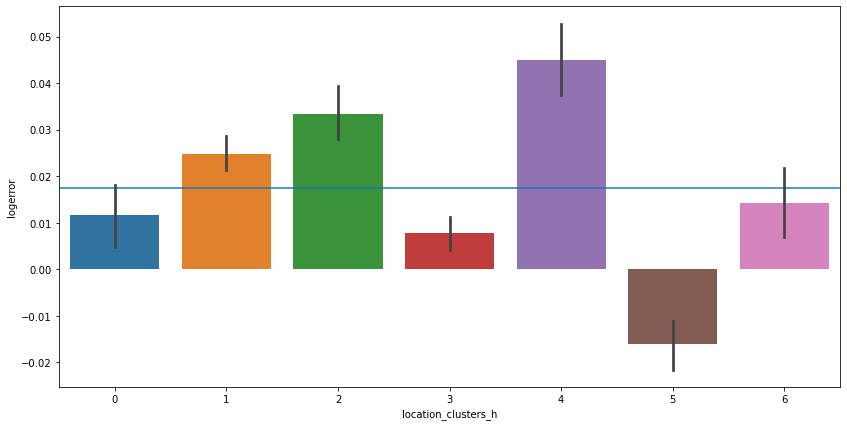

In [52]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=7)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_h'] = location_clusters
train.groupby('location_clusters_h').logerror.mean()
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_h', y=
            'logerror', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=8**</span>

<AxesSubplot:xlabel='location_clusters_i', ylabel='logerror'>

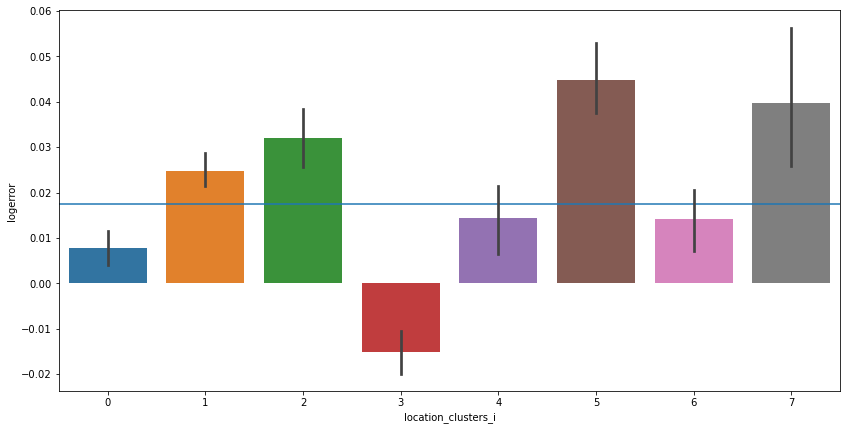

In [53]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=8)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_i'] = location_clusters
train.groupby('location_clusters_i').logerror.mean()
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_i', y=
            'logerror', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=9**</span>

<AxesSubplot:xlabel='location_clusters_j', ylabel='logerror'>

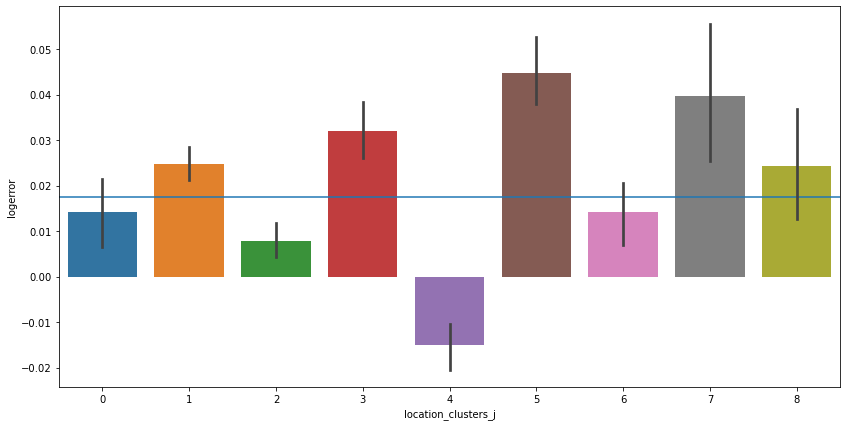

In [54]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=9)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_j'] = location_clusters
train.groupby('location_clusters_j').logerror.mean()
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_j', y=
            'logerror', data = train)

<span style='background :yellow' >**latitude, longitude, conuty(dummies), k=3**</span>

In [35]:
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'latitude', 'longitude']]

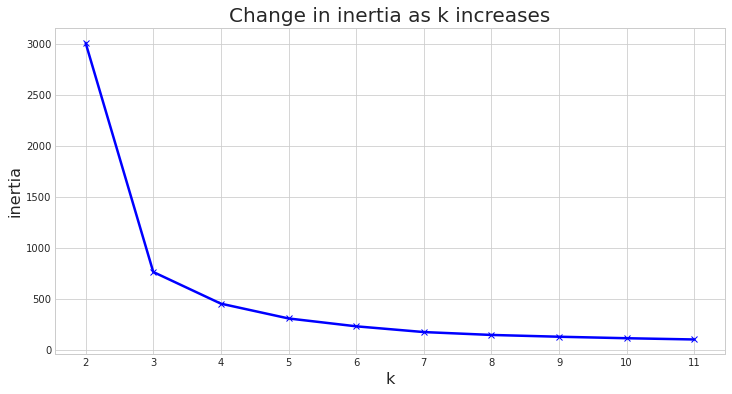

In [36]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [45]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'latitude', 'longitude']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_k'] = location_clusters
train.groupby('location_clusters_k').logerror.mean()

location_clusters_k
0    0.013415
1    0.027825
2    0.016211
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_k', ylabel='logerror'>

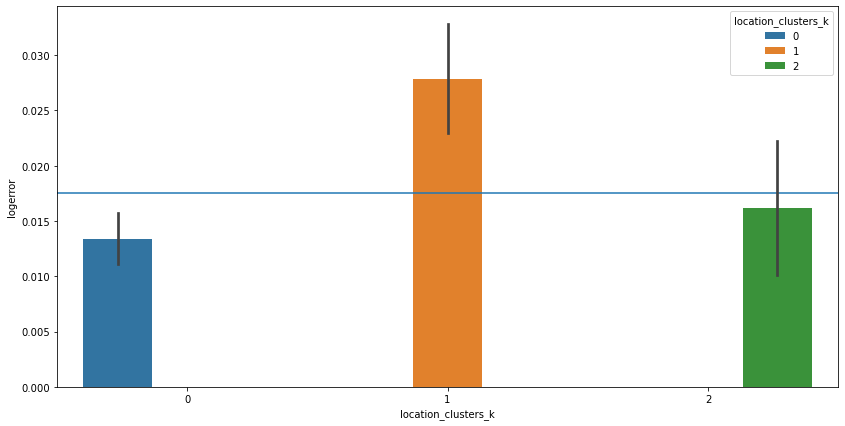

In [46]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_k', y=
            'logerror', hue='location_clusters_k', data = train)

In [42]:
# Set alpha
alpha = 0.05
cluster0 = train[train.location_clusters_e==0].logerror
cluster1 = train[train.location_clusters_e==1].logerror
cluster2 = train[train.location_clusters_e==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 location clusters are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of 3 location clusters are not all equal. 


**However, cluster 0 and 2 is not significantly different.**

<span style='background :yellow' >**latitude, longitude, conuty(dummies), k=4**</span>

In [47]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'latitude', 'longitude']]
location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_l'] = location_clusters
train.groupby('location_clusters_l').logerror.mean()

location_clusters_l
0    0.012903
1    0.027825
2    0.016211
3    0.014298
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_l', ylabel='logerror'>

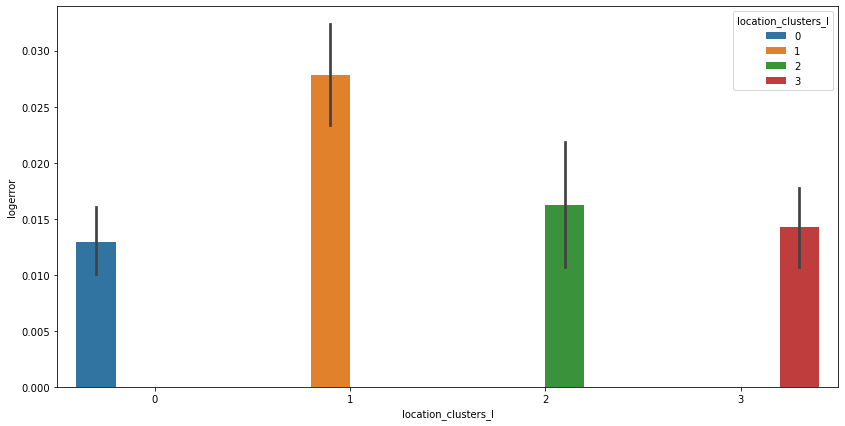

In [48]:
plt.figure(figsize = (14,7))
sns.barplot(x='location_clusters_l', y=
            'logerror', hue='location_clusters_l', data = train)

***

## Age Cluster

<span style='background :yellow' >**age, k=3**</span>

In [45]:
cluster_vars = train[['age']]

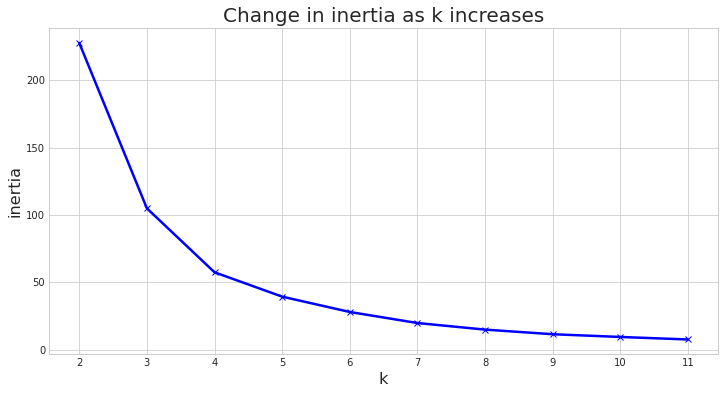

In [46]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [47]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['age']]
age_clusters = kmeans.predict(cluster_vars)
train['age_clusters_a'] = age_clusters
train.groupby('location_clusters_a').logerror.mean()

location_clusters_a
0    0.012651
1    0.021930
2    0.017138
Name: logerror, dtype: float64

<AxesSubplot:xlabel='age', ylabel='logerror'>

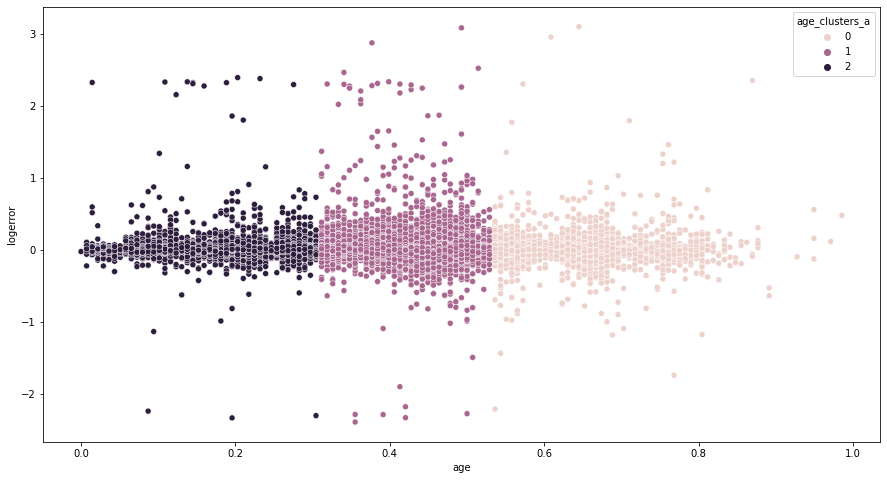

In [50]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='logerror', hue='age_clusters_a', data=train)

In [52]:
# Set alpha
alpha = 0.05
cluster0 = train[train.age_clusters_a==0].logerror
cluster1 = train[train.age_clusters_a==1].logerror
cluster2 = train[train.age_clusters_a==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 location clusters are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of 3 location clusters are not all equal. 


<AxesSubplot:xlabel='area_clusters_a', ylabel='logerror'>

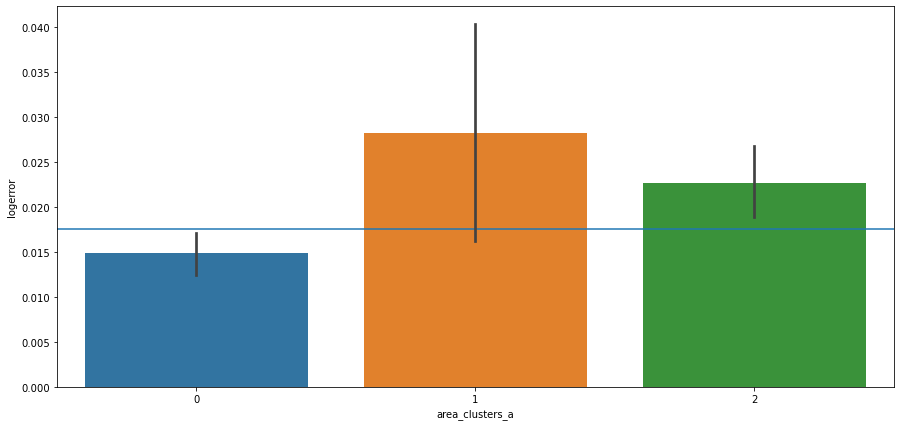

In [163]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='area_clusters_a', y='logerror', data = train)

<span style='background :yellow' >**age, k=4**</span>

In [54]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['age']]
age_clusters = kmeans.predict(cluster_vars)
train['age_clusters_b'] = age_clusters
train.groupby('age_clusters_b').logerror.mean()

age_clusters_b
0    0.015724
1    0.017033
2    0.023436
3    0.009459
Name: logerror, dtype: float64

<AxesSubplot:xlabel='age', ylabel='logerror'>

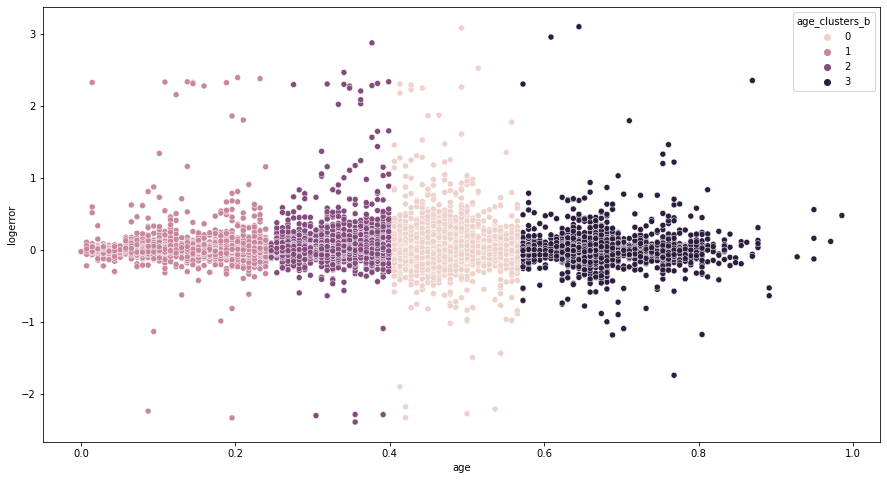

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='logerror', hue='age_clusters_b', data=train)

<AxesSubplot:xlabel='age_clusters_b', ylabel='logerror'>

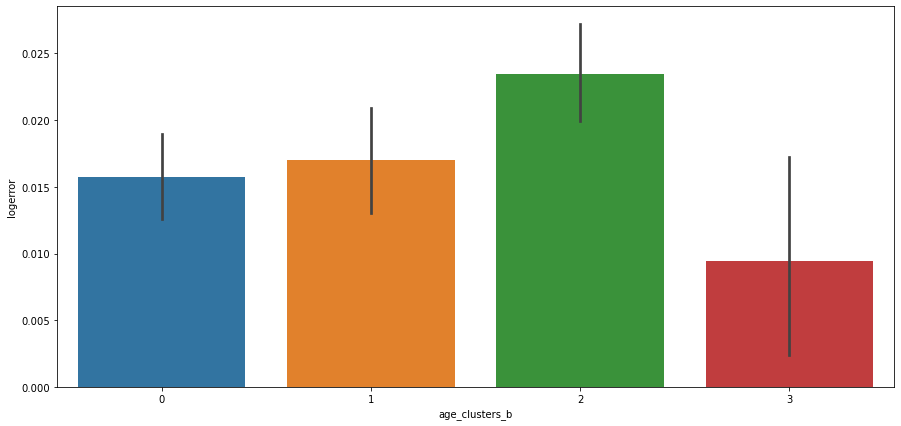

In [82]:
plt.figure(figsize = (15,7))
sns.barplot(x='age_clusters_b', y='logerror', data = train)

***

## Area Cluster

<span style='background :yellow' >**Area: total_sqft, lot_sqft, k==3**</span>

In [59]:
cluster_vars = train[['total_sqft', 'lot_sqft']]

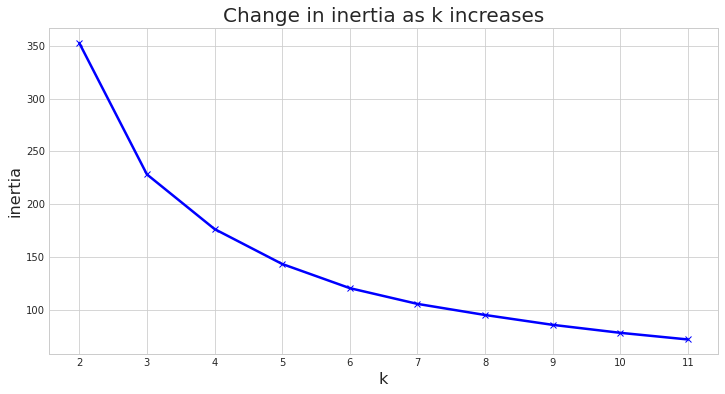

In [60]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [62]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['total_sqft', 'lot_sqft']]
area_clusters = kmeans.predict(cluster_vars)
train['area_clusters_a'] = area_clusters
train.groupby('area_clusters_a').logerror.mean()

area_clusters_a
0    0.014898
1    0.028238
2    0.022662
Name: logerror, dtype: float64

<AxesSubplot:xlabel='area_clusters_a', ylabel='logerror'>

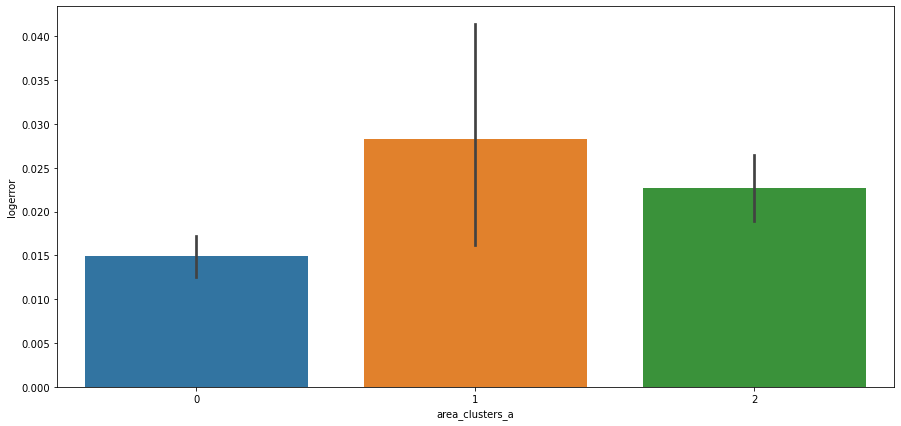

In [81]:
plt.figure(figsize = (15,7))
sns.barplot(x='area_clusters_a', y='logerror', data = train)

<AxesSubplot:xlabel='total_sqft', ylabel='lot_sqft'>

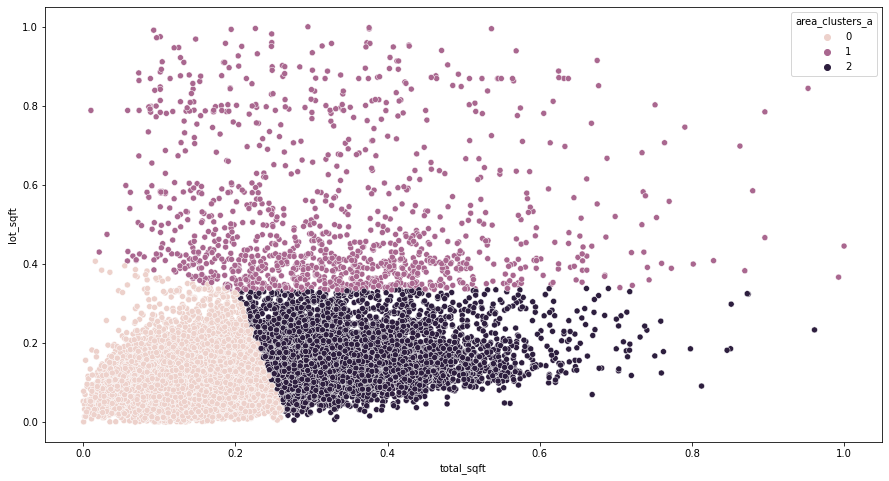

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='total_sqft', y='lot_sqft', hue='area_clusters_a', data=train)

In [69]:
# Set alpha
alpha = 0.05
cluster0 = train[train.area_clusters_a==0].logerror
cluster1 = train[train.area_clusters_a==1].logerror
cluster2 = train[train.area_clusters_a==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 area clusters are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of 3 area clusters are not all equal. 


<span style='background :yellow' >**Area: total_sqft, lot_sqft, k==4**</span>

In [70]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['total_sqft', 'lot_sqft']]
area_clusters = kmeans.predict(cluster_vars)
train['area_clusters_b'] = area_clusters
train.groupby('area_clusters_b').logerror.mean()

area_clusters_b
0    0.014677
1    0.018912
2    0.024202
3    0.024980
Name: logerror, dtype: float64

<AxesSubplot:xlabel='area_clusters_b', ylabel='logerror'>

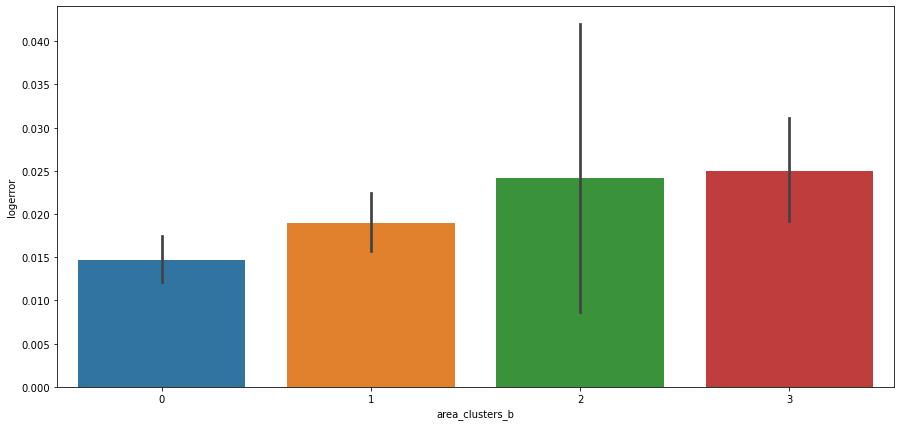

In [73]:
plt.figure(figsize = (15,7))
sns.barplot(x='area_clusters_b', y='logerror', data = train)

**NOTE: Cluster 2 and 3 hardly have any difference.We will pass on this cluster.**

<span style='background :red' >**Area: total_sqft, lot_sqft, living_sqft, k==3**</span>

In [75]:
cluster_vars = train[['total_sqft', 'lot_sqft', 'living_sqft']]

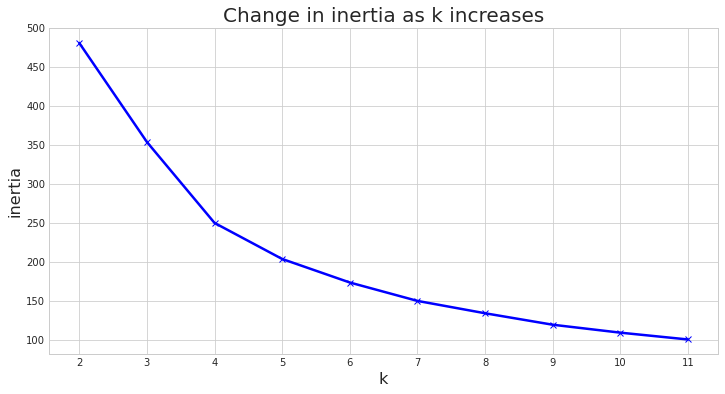

In [76]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [77]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['total_sqft', 'lot_sqft', 'living_sqft']]
area_clusters = kmeans.predict(cluster_vars)
train['area_clusters_c'] = area_clusters
train.groupby('area_clusters_c').logerror.mean()

area_clusters_c
0    0.029228
1    0.014924
2    0.022563
Name: logerror, dtype: float64

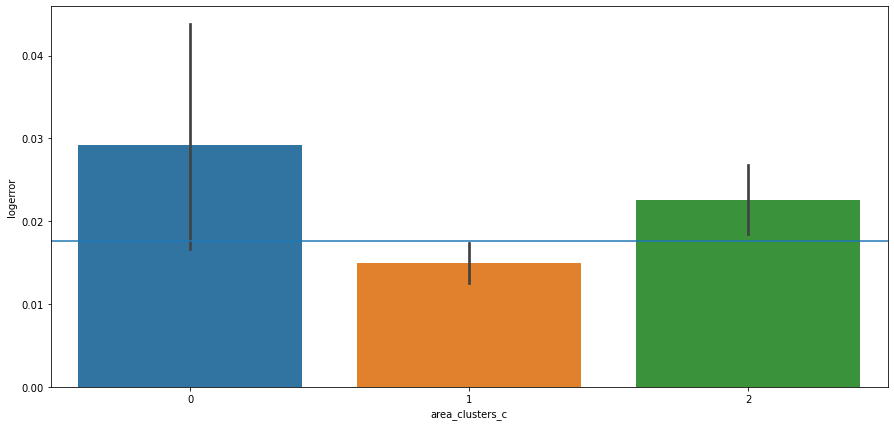

In [124]:
plt.figure(figsize = (15,7))
sns.barplot(x='area_clusters_c', y='logerror', data = train)
plt.axhline(train.logerror.mean())

<span style='background :yellow' >**Area: total_sqft, lot_sqft, living_sqft, k==4**</span>

In [79]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['total_sqft', 'lot_sqft', 'living_sqft']]
area_clusters = kmeans.predict(cluster_vars)
train['area_clusters_d'] = area_clusters
train.groupby('area_clusters_d').logerror.mean()

area_clusters_d
0    0.018004
1    0.028556
2    0.014885
3    0.018273
Name: logerror, dtype: float64

<AxesSubplot:xlabel='area_clusters_d', ylabel='logerror'>

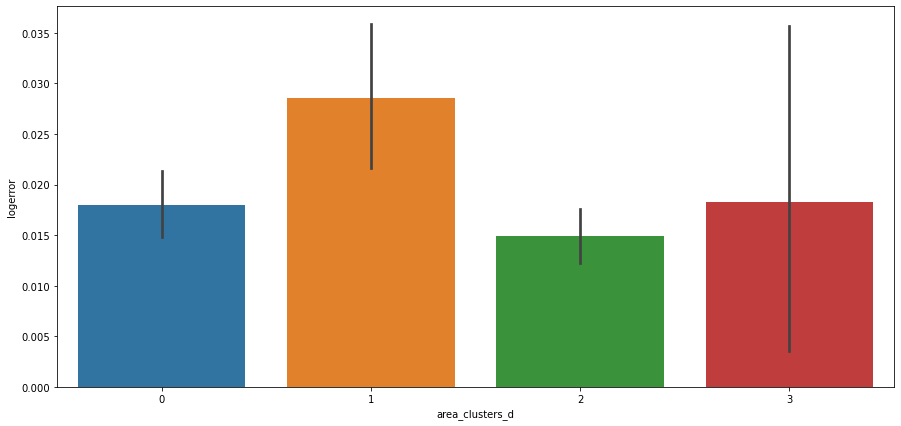

In [80]:
plt.figure(figsize = (15,7))
sns.barplot(x='area_clusters_d', y='logerror', data = train)

## Size Cluster

<span style='background :red' >**Size: bedrooms, bathrooms, full_bath, k==3**</span>

In [109]:
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath']]

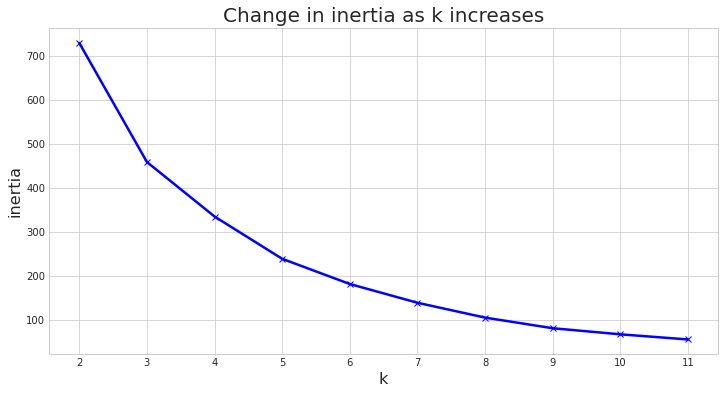

In [110]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [112]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_a'] = size_clusters
train.groupby('size_clusters_a').logerror.mean()

size_clusters_a
0    0.016662
1    0.021802
2    0.014389
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_a', ylabel='logerror'>

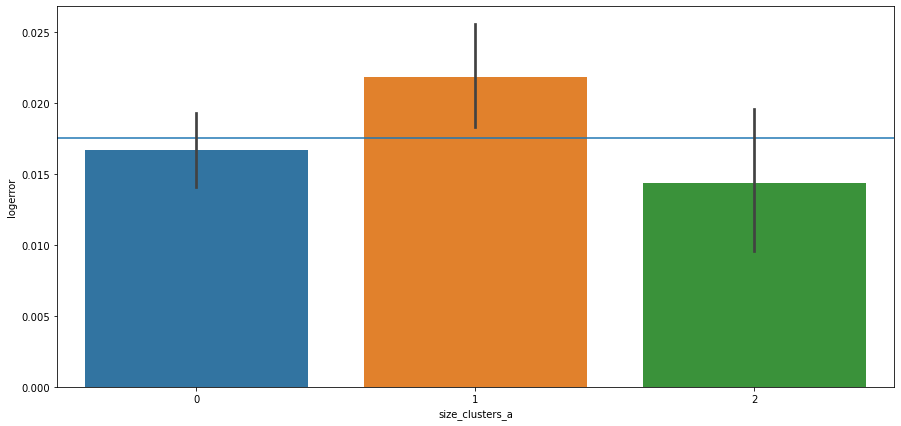

In [130]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_a', y='logerror', data = train)

<span style='background :yellow' >**Size:  bedrooms, bathrooms, full_bath, k==4**</span>

In [114]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_b'] = size_clusters
train.groupby('size_clusters_b').logerror.mean()

size_clusters_b
0    0.021885
1    0.015177
2    0.020273
3    0.014115
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_b', ylabel='logerror'>

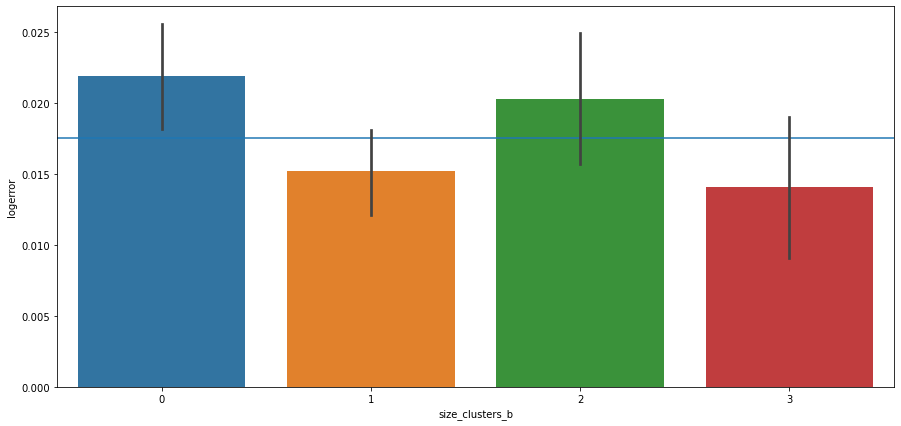

In [129]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_b', y='logerror', data = train)

<span style='background :yellow' >**Size:  bedrooms, bathrooms, full_bath, roomcnt, k==3**</span>

In [118]:
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath', 'roomcnt']]

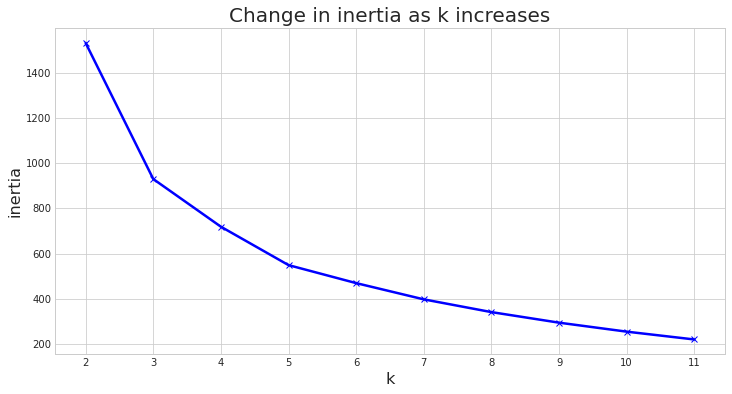

In [119]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [120]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath', 'roomcnt']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_c'] = size_clusters
train.groupby('size_clusters_c').logerror.mean()

size_clusters_c
0    0.012668
1    0.023499
2    0.021078
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_c', ylabel='logerror'>

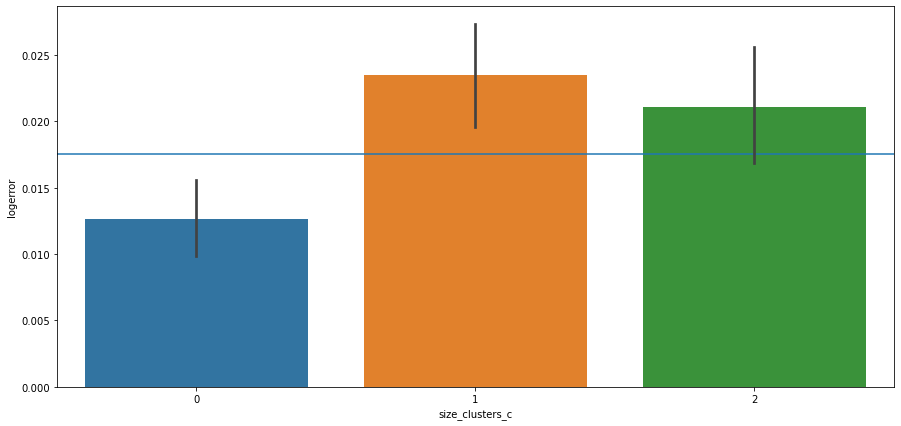

In [128]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_c', y='logerror', data = train)

<span style='background :yellow' >**Size:  bedrooms, bathrooms, full_bath, roomcnt, k==4**</span>

In [122]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath', 'roomcnt']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_d'] = size_clusters
train.groupby('size_clusters_d').logerror.mean()

size_clusters_d
0    0.014042
1    0.023111
2    0.020156
3    0.012690
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_d', ylabel='logerror'>

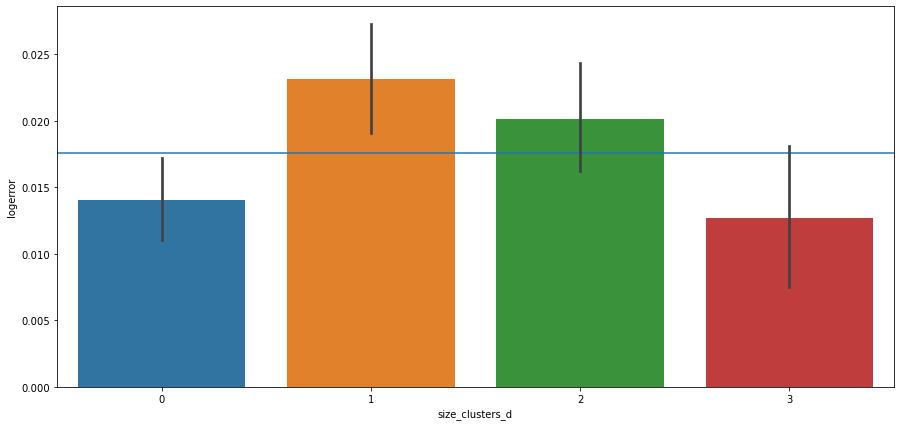

In [127]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_d', y='logerror', data = train)

<span style='background :yellow' >**Size:  bedrooms, bathrooms, full_bath, roomcnt, k==5**</span>

In [125]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath', 'roomcnt']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_e'] = size_clusters
train.groupby('size_clusters_e').logerror.mean()

size_clusters_e
0    0.014042
1    0.022597
2    0.020093
3    0.011791
4    0.025512
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_e', ylabel='logerror'>

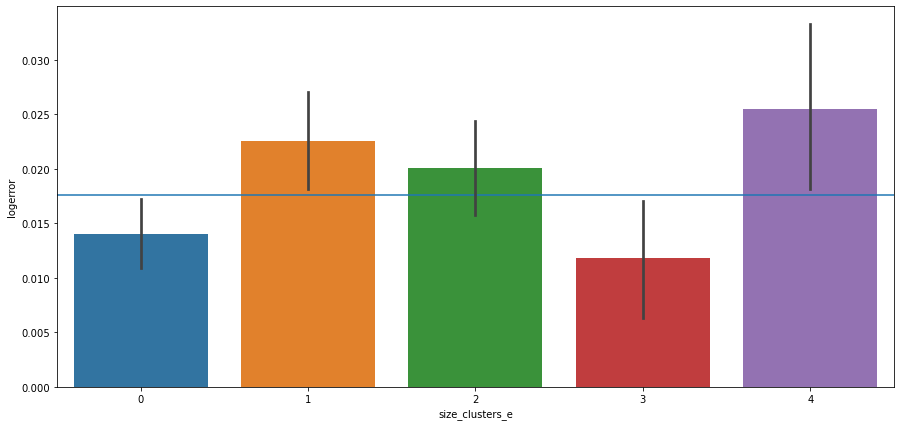

In [139]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_e', y='logerror', data = train)

***

## Value Cluster

<span style='background :red' >**Value:  'structure_value', 'assessed_value', 'land_value','taxamount', k==3**</span>

In [131]:
cluster_vars = train[['structure_value', 'assessed_value', 'land_value','taxamount']]

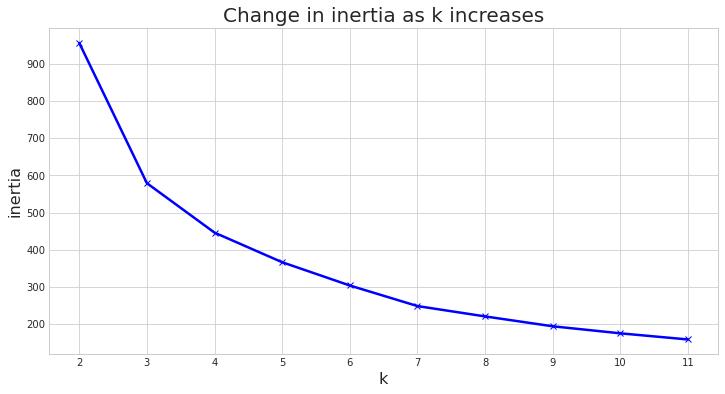

In [132]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [137]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value','taxamount']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_a'] = value_clusters
train.groupby('value_clusters_a').logerror.mean()

value_clusters_a
0    0.016267
1    0.020495
2    0.014524
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_a', ylabel='logerror'>

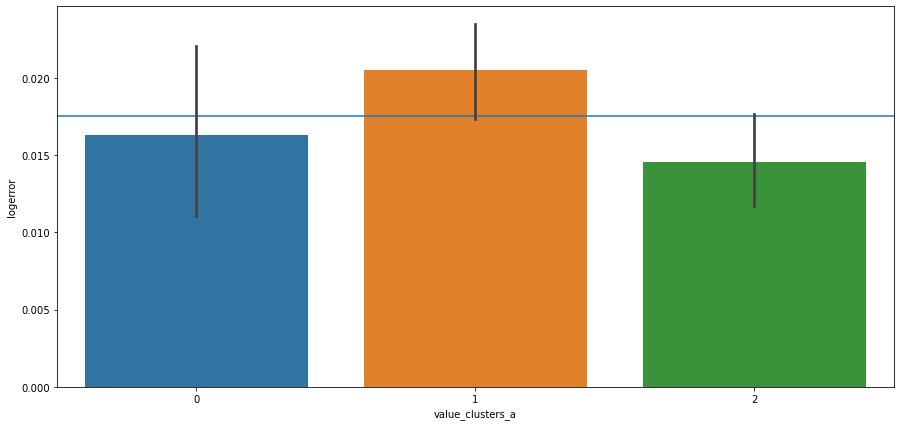

In [140]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_a', y='logerror', data = train)

In [147]:
t, p = stats.ttest_ind(train[train.value_clusters_a==2].logerror, train[train.value_clusters_a==1].logerror)
if p < alpha:
    print('its siginificantly')
    if t>0:
        print('higher than the overall mean error.')
    else:
        print('lower than the overall mean error.')
else:
    print('not significant')

its siginificantly
lower than the overall mean error.


In [144]:
# Set alpha
alpha = 0.05
cluster0 = train[train.value_clusters_a==0].logerror
cluster1 = train[train.value_clusters_a==1].logerror
cluster2 = train[train.value_clusters_a==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 value clusters are not all equal. ')
else:
    print('We fail to reject H0')
    

We reject H0.

Mean of 3 value clusters are not all equal. 


<span style='background :yellow' >**Value:  'structure_value', 'assessed_value', 'land_value','taxamount', k==4**</span>

In [150]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value','taxamount']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_b'] = value_clusters
train.groupby('value_clusters_b').logerror.mean()

value_clusters_b
0    0.017551
1    0.019929
2    0.018130
3    0.013381
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_b', ylabel='logerror'>

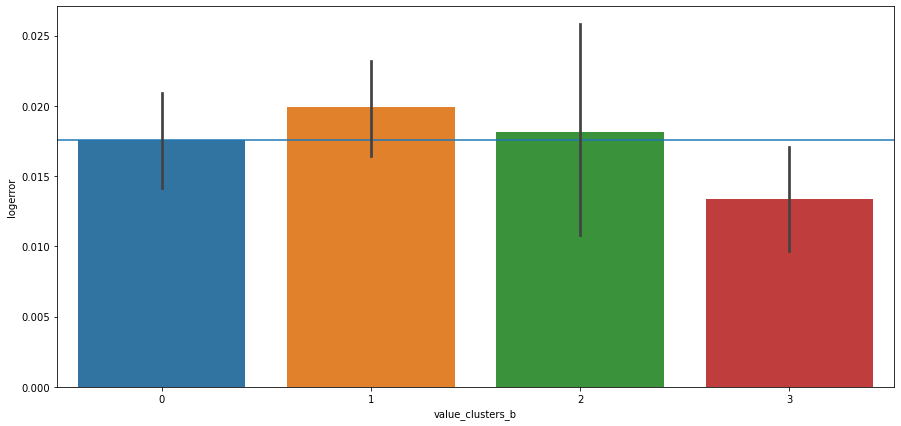

In [151]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_b', y='logerror', data = train)

<span style='background :yellow' >**Value:  'structure_value', 'assessed_value', 'land_value','taxamount', k==5**</span>

In [153]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value','taxamount']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_c'] = value_clusters
train.groupby('value_clusters_c').logerror.mean()

value_clusters_c
0    0.021045
1    0.020007
2    0.016957
3    0.016720
4    0.013532
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_c', ylabel='logerror'>

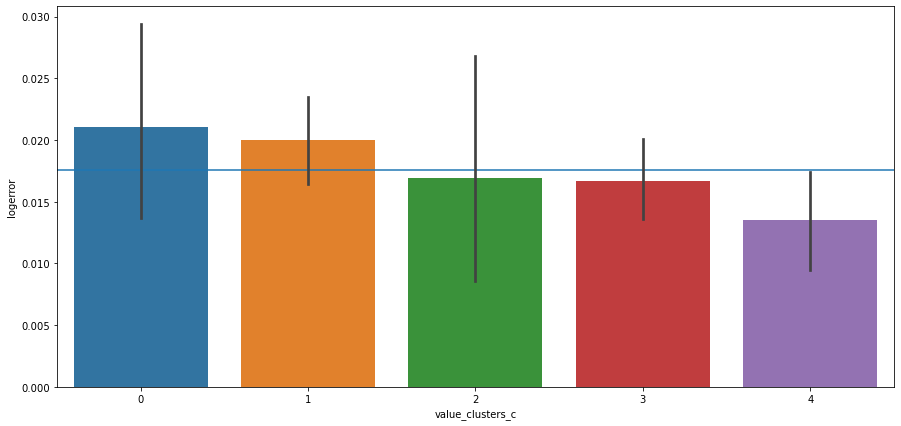

In [154]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_c', y='logerror', data = train)

<span style='background :yellow' >**Value:  'structure_value', 'assessed_value', 'land_value', k==3**</span>

In [156]:
cluster_vars = train[['structure_value', 'assessed_value', 'land_value']]

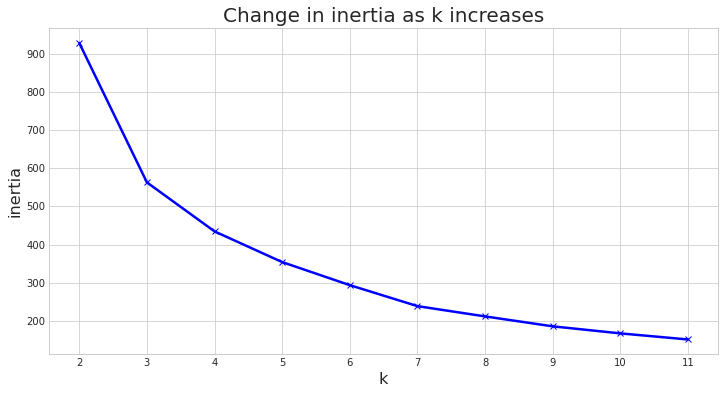

In [157]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [158]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_d'] = value_clusters
train.groupby('value_clusters_d').logerror.mean()

value_clusters_d
0    0.014918
1    0.016075
2    0.020267
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_d', ylabel='logerror'>

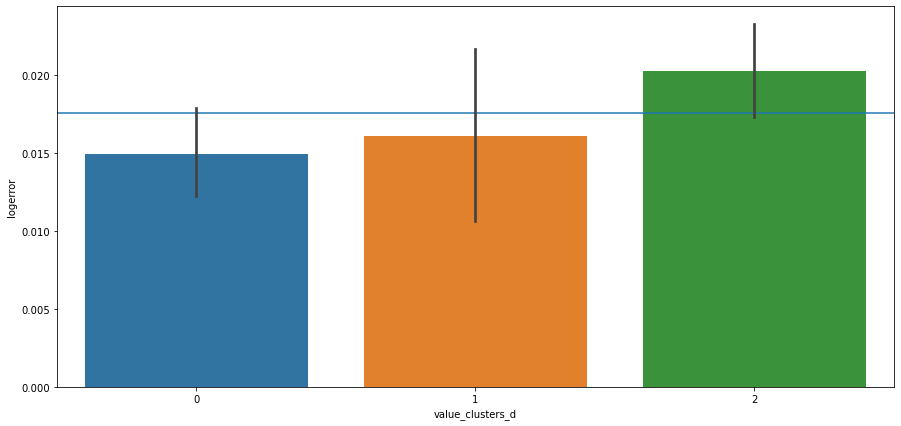

In [159]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_d', y='logerror', data = train)

<span style='background :yellow' >**Value:  'structure_value', 'assessed_value', 'land_value', k==4**</span>

In [160]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_e'] = value_clusters
train.groupby('value_clusters_e').logerror.mean()

value_clusters_e
0    0.019641
1    0.018252
2    0.018032
3    0.012929
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_e', ylabel='logerror'>

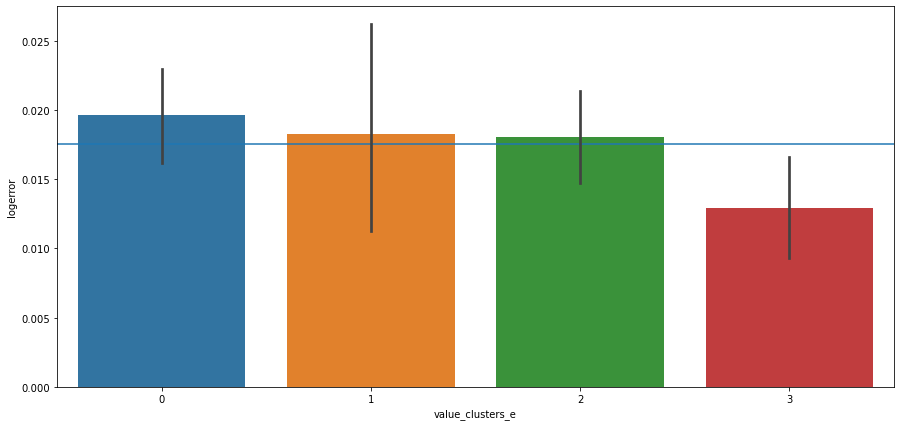

In [161]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_e', y='logerror', data = train)